In [2]:
import pandas as pd
import matplotlib as plt
import scipy as sc
#PyMC 

In [30]:
data=pd.read_csv('brain_size.csv', sep=';', na_values='.')

In [4]:
data.head(10)

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


In [5]:
import numpy as np
x=np.linspace(-6,8,20)
sinx=np.sin(x)
cosx=np.cos(x)

In [6]:
dd=pd.DataFrame({'x': x, 'sin x': sinx, 'cos x': cosx})

In [7]:
dd.head(10)

,x,sin x,cos x
0,-6.000000,0.279415,0.960170
1,-5.263158,0.852122,0.523343
2,-4.526316,0.982738,-0.185001
3,-3.789474,0.603498,-0.797364
4,-3.052632,-0.088844,-0.996046
5,-2.315789,-0.735093,-0.677967
6,-1.578947,-0.999967,-0.008151
7,-0.842105,-0.746047,0.665894
8,-0.105263,-0.105069,0.994465
9,0.631579,0.590420,0.807096


In [12]:
nn=data.shape
nn

(40, 8)

In [14]:
dcolumns=data.columns.to_list()
dcolumns

['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count']

In [15]:
for ll in dcolumns:
    print(data[ll][3])

4
Male
133
129
128
172.0
68.8
965353


In [19]:
data[dcolumns[1]]

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object

In [20]:
data[data['Gender']=='Female']['PIQ'].mean()

110.45

In [21]:
ll = data[data['Gender']=='Female']['PIQ']
ll

0     124
4     134
5     110
6     131
7      98
10    124
13    147
14     90
15     96
16    120
18     84
22    134
24    102
26     84
28     72
29    124
30    132
34     81
35    128
37     94
Name: PIQ, dtype: int64

In [25]:
type(ll)

pandas.core.series.Series

In [32]:
data[(data['Gender']=='Male') & (data['VIQ']>100)]

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
9,10,Male,133,114,147,172.0,68.8,955466
11,12,Male,141,150,128,151.0,70.0,1079549
12,13,Male,135,129,124,155.0,69.0,924059
21,22,Male,97,107,84,186.0,76.5,905940
23,24,Male,139,145,128,132.0,68.0,955003
25,26,Male,141,145,131,171.0,72.0,935494
31,32,Male,144,145,137,191.0,67.0,949589


In [35]:
grGen = data.groupby('Gender')

In [37]:
for gen, value in grGen['PIQ']:
    print(gen, value.mean())

Female 110.45
Male 111.6


In [38]:
grGen.max()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,38,140,136,147,175.0,70.5,991305
Male,40,144,150,150,192.0,77.0,1079549


In [39]:
grGen.min()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,1,77,71,72,106.0,62.0,790619
Male,2,80,77,74,132.0,66.3,879987


In [40]:
grGen.median()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,18.0,115.5,116.0,115.0,138.5,66.0,855365.0
Male,21.5,118.0,110.5,117.0,172.0,70.5,947241.5


In [41]:
from pandas import plotting

In [ ]:
#y = a + b1 * x1 + b2 * x2 ... - linear regression

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6fb33a910>,
      dtype=object)

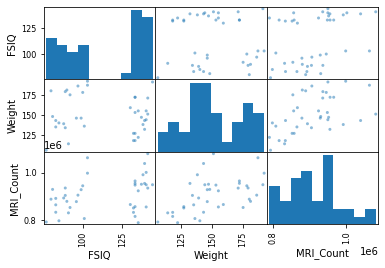

In [42]:
plotting.scatter_matrix(data[['FSIQ', 'Weight', 'MRI_Count' ]])

Взаимное рассеяние, как данные связаны друг с другом. Параметры не связаны, так как вся клеточка почти равномерно заполнена точечками - не коррелируют между собой.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6fb754700>,
      dtype=object)

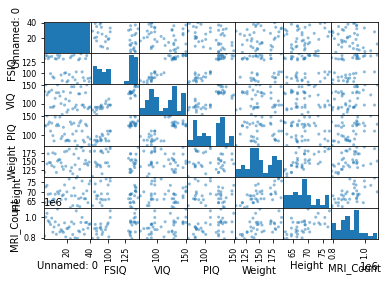

In [44]:
plotting.scatter_matrix(data)

In [45]:
from scipy import stats

In [46]:
stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

In [50]:
fVIQ=data[data['Gender']=='Female']['VIQ']
mVIQ=data[data['Gender']=='Male']['VIQ']

In [51]:
stats.ttest_1samp(fVIQ,mVIQ)

Ttest_1sampResult(statistic=1    -8.368130
2    -2.796256
3    -4.034450
8     3.394716
9    -0.938964
11   -8.368130
12   -4.034450
17    2.775619
19    6.696568
20    5.458373
21    0.505596
23   -7.336302
25   -7.336302
27    2.775619
31   -7.336302
32    2.775619
33    2.775619
36   -8.368130
38    4.013813
39    3.807448
Name: VIQ, dtype: float64, pvalue=array([8.53672065e-08, 1.15172135e-02, 7.08211877e-04, 3.04058564e-03,
       3.59533563e-01, 8.53672065e-08, 7.08211877e-04, 1.20460689e-02,
       2.11193592e-06, 2.88586179e-05, 6.18955459e-01, 5.91784358e-07,
       5.91784358e-07, 1.20460689e-02, 5.91784358e-07, 1.20460689e-02,
       1.20460689e-02, 8.53672065e-08, 7.42394115e-04, 1.18938100e-03]))